In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
train_df = pd.read_csv('aps_failure_training_set_processed_8bit.csv')

In [3]:
test_df = pd.read_csv('Air_pressure_test.csv')

In [4]:
train_label = pd.read_csv('Air_class_train.csv')['class']

In [5]:
test_label = pd.read_csv('Air_class_test.csv')['class']

In [6]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.992188,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,-0.992188,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,-0.992188,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,-0.992188,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


In [7]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
2,-0.992188,0.046875,0.554688,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.046875,0.312500,-0.000000,-0.109375,0.914062,-0.109375,-0.304688,-0.171875,-0.023438,-0.023438
3,-0.992188,0.000000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.085938,0.062500,0.031250,0.085938,0.093750,-0.078125,0.320312,-0.109375,-0.023438,-0.023438
4,-0.992188,-0.390625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.375000,-0.375000,-0.359375,-0.304688,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.992188,0.156250,0.218750,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.164062,0.117188,0.054688,-0.015625,0.015625,-0.015625,0.992188,0.359375,-0.023438,-0.023438
15996,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,0.007812,0.070312,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
15997,-0.992188,0.140625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.312500,0.437500,0.281250,0.164062,0.039062,-0.070312,0.492188,0.234375,-0.023438,-0.023438
15998,-0.992188,-0.406250,0.445312,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438


In [8]:
train_label

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [9]:
test_label

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 16000, dtype: object

In [10]:
train_df['class'] = train_label

In [11]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,neg,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,neg,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,neg,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,neg,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,neg,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,neg,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


In [12]:
test_df['class'] = test_label

In [13]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
2,neg,0.046875,0.554688,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.046875,0.312500,-0.000000,-0.109375,0.914062,-0.109375,-0.304688,-0.171875,-0.023438,-0.023438
3,neg,0.000000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.085938,0.062500,0.031250,0.085938,0.093750,-0.078125,0.320312,-0.109375,-0.023438,-0.023438
4,neg,-0.390625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.375000,-0.375000,-0.359375,-0.304688,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,0.156250,0.218750,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.164062,0.117188,0.054688,-0.015625,0.015625,-0.015625,0.992188,0.359375,-0.023438,-0.023438
15996,neg,-0.406250,-0.289062,-0.468750,-0.007812,0.007812,0.070312,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
15997,neg,0.140625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.312500,0.437500,0.281250,0.164062,0.039062,-0.070312,0.492188,0.234375,-0.023438,-0.023438
15998,neg,-0.406250,0.445312,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438


In [14]:
y_train =train_df['class']

In [15]:
X_train = train_df.drop(['class'],axis = 'columns')

In [16]:
y_train

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [17]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


In [18]:
y_test = test_df['class']

In [19]:
X_test = test_df.drop(['class'],axis = 'columns')

In [20]:
y_test

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 16000, dtype: object

In [21]:
X_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
2,0.046875,0.554688,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,0.148438,...,0.046875,0.312500,-0.000000,-0.109375,0.914062,-0.109375,-0.304688,-0.171875,-0.023438,-0.023438
3,0.000000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.085938,0.062500,0.031250,0.085938,0.093750,-0.078125,0.320312,-0.109375,-0.023438,-0.023438
4,-0.390625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.375000,-0.375000,-0.359375,-0.304688,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.156250,0.218750,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.164062,0.117188,0.054688,-0.015625,0.015625,-0.015625,0.992188,0.359375,-0.023438,-0.023438
15996,-0.406250,-0.289062,-0.468750,-0.007812,0.007812,0.070312,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
15997,0.140625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.312500,0.437500,0.281250,0.164062,0.039062,-0.070312,0.492188,0.234375,-0.023438,-0.023438
15998,-0.406250,0.445312,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438


In [22]:
from sklearn.linear_model import LinearRegression,LogisticRegression
rog = LogisticRegression()


In [23]:
reg = LinearRegression()

In [24]:
rog.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
rog.score(X_test,y_test)

0.9896875

In [26]:
from sklearn.decomposition import PCA

In [27]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


# Dimensionality Reduction With PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
# n_component means no. of columns

In [30]:
n_components = 170

In [31]:
pca = PCA(n_components = n_components)

In [32]:
pca.fit(X_train)

PCA(n_components=170)

In [33]:
X_train_reduce = pca.transform(X_train)

In [34]:
X_train_reduce

array([[ 3.65489180e+00,  2.31791951e-01, -6.31575991e-01, ...,
         1.43726554e-05, -6.52248101e-18,  2.51892118e-16],
       [ 7.37432635e-01, -8.73623621e-01,  5.46221568e-01, ...,
        -3.13975132e-05, -8.62947704e-17, -3.66933783e-16],
       [-2.39951775e-01, -2.29744995e-01,  4.99109151e-01, ...,
         1.94843945e-06, -2.69146547e-17,  1.60131386e-16],
       ...,
       [-1.47582365e+00, -2.64477391e+00,  1.51149214e+00, ...,
         8.33932293e-06,  3.45936831e-17, -1.95471673e-16],
       [ 2.81535436e+00,  3.55274344e-01,  1.64848600e+00, ...,
        -2.42526459e-04,  4.89095998e-17,  1.05188146e-16],
       [ 1.08638582e+00, -1.49366172e+00, -7.93765831e-01, ...,
        -1.87887513e-05,  2.62521534e-17, -2.87130740e-16]])

In [35]:
X_train_reduce = pd.DataFrame(pca.transform(X_train))

In [36]:
X_train_reduce

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,3.654892,0.231792,-0.631576,-1.113085,0.629908,-1.732416,0.593102,0.167641,0.113404,-0.434172,...,-0.001041,0.000003,-0.000603,0.000133,0.000279,-0.000134,-0.000082,0.000014,-6.522481e-18,2.518921e-16
1,0.737433,-0.873624,0.546222,-0.314210,-0.185739,0.317110,0.023041,0.517038,0.442599,-0.369288,...,-0.003441,-0.000700,0.000225,-0.000379,0.000156,0.000246,0.000002,-0.000031,-8.629477e-17,-3.669338e-16
2,-0.239952,-0.229745,0.499109,-0.449917,-0.430592,0.209943,-0.399857,-0.325520,-0.194321,0.404520,...,0.000038,-0.001277,-0.000075,0.000012,-0.000034,-0.000019,-0.000025,0.000002,-2.691465e-17,1.601314e-16
3,-3.677815,2.040501,0.283591,-0.060540,-0.035350,-0.124737,0.092517,-0.015774,-0.016755,-0.166371,...,0.001260,0.000850,0.000102,0.003207,-0.000052,-0.000050,-0.000117,-0.000068,2.486063e-16,3.880855e-16
4,1.993336,-0.824339,-1.060542,-0.048451,-0.720427,-0.264300,0.046174,-0.364098,-0.363116,-0.750308,...,0.006210,0.000734,-0.000072,0.000034,0.000183,0.000115,-0.000061,-0.000099,-3.143799e-17,-6.096869e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5.515235,1.311552,-0.915232,-0.907502,-0.519739,-0.094869,0.104384,-0.691787,-0.361183,-0.184843,...,0.007798,0.004201,0.000391,0.000246,0.000267,-0.000011,-0.000155,-0.000047,1.569735e-18,3.668263e-16
59996,-1.271349,-2.650293,1.140903,0.269618,0.772715,-0.280660,-0.091092,-0.005311,-0.190347,0.312311,...,-0.001483,-0.001790,-0.000089,0.000230,-0.000043,0.000022,0.000022,-0.000010,2.336245e-17,7.998654e-17
59997,-1.475824,-2.644774,1.511492,0.244883,0.750658,-0.228021,-0.036384,-0.001816,-0.232507,0.307124,...,0.000383,0.000377,-0.000023,-0.000150,-0.000022,-0.000018,0.000028,0.000008,3.459368e-17,-1.954717e-16
59998,2.815354,0.355274,1.648486,-1.940332,0.317535,-1.574300,1.256060,0.500123,0.118277,0.380955,...,-0.002248,0.002120,0.000101,-0.000701,0.000096,-0.000039,-0.000053,-0.000243,4.890960e-17,1.051881e-16


In [37]:
X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index ,columns = X_train.columns)

In [38]:
X_train_reduce

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,3.654892,0.231792,-0.631576,-1.113085,0.629908,-1.732416,0.593102,0.167641,0.113404,-0.434172,...,-0.001041,0.000003,-0.000603,0.000133,0.000279,-0.000134,-0.000082,0.000014,-6.522481e-18,2.518921e-16
1,0.737433,-0.873624,0.546222,-0.314210,-0.185739,0.317110,0.023041,0.517038,0.442599,-0.369288,...,-0.003441,-0.000700,0.000225,-0.000379,0.000156,0.000246,0.000002,-0.000031,-8.629477e-17,-3.669338e-16
2,-0.239952,-0.229745,0.499109,-0.449917,-0.430592,0.209943,-0.399857,-0.325520,-0.194321,0.404520,...,0.000038,-0.001277,-0.000075,0.000012,-0.000034,-0.000019,-0.000025,0.000002,-2.691465e-17,1.601314e-16
3,-3.677815,2.040501,0.283591,-0.060540,-0.035350,-0.124737,0.092517,-0.015774,-0.016755,-0.166371,...,0.001260,0.000850,0.000102,0.003207,-0.000052,-0.000050,-0.000117,-0.000068,2.486063e-16,3.880855e-16
4,1.993336,-0.824339,-1.060542,-0.048451,-0.720427,-0.264300,0.046174,-0.364098,-0.363116,-0.750308,...,0.006210,0.000734,-0.000072,0.000034,0.000183,0.000115,-0.000061,-0.000099,-3.143799e-17,-6.096869e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5.515235,1.311552,-0.915232,-0.907502,-0.519739,-0.094869,0.104384,-0.691787,-0.361183,-0.184843,...,0.007798,0.004201,0.000391,0.000246,0.000267,-0.000011,-0.000155,-0.000047,1.569735e-18,3.668263e-16
59996,-1.271349,-2.650293,1.140903,0.269618,0.772715,-0.280660,-0.091092,-0.005311,-0.190347,0.312311,...,-0.001483,-0.001790,-0.000089,0.000230,-0.000043,0.000022,0.000022,-0.000010,2.336245e-17,7.998654e-17
59997,-1.475824,-2.644774,1.511492,0.244883,0.750658,-0.228021,-0.036384,-0.001816,-0.232507,0.307124,...,0.000383,0.000377,-0.000023,-0.000150,-0.000022,-0.000018,0.000028,0.000008,3.459368e-17,-1.954717e-16
59998,2.815354,0.355274,1.648486,-1.940332,0.317535,-1.574300,1.256060,0.500123,0.118277,0.380955,...,-0.002248,0.002120,0.000101,-0.000701,0.000096,-0.000039,-0.000053,-0.000243,4.890960e-17,1.051881e-16


In [39]:
# i want columns name pca = PC-0

In [40]:
# when pc0 start then use only i other wise i+1 ie. pc1

In [41]:
#X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index,columns = ['PC' + str(i) for i in range(n_component)])

In [42]:
X_train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,-0.124611,-0.071121,-0.198529,-0.007737,-0.033483,-0.040633,-0.006584,-0.026241,-0.040699,-0.074768,...,-0.104808,-0.098734,-0.094976,-0.089227,-0.103374,-0.088961,-0.084540,-0.067471,-0.020035,-0.018417
std,0.367680,0.356812,0.564872,0.004138,0.107086,0.111752,0.032016,0.065200,0.105864,0.186822,...,0.356547,0.362066,0.363148,0.336121,0.320314,0.237613,0.363893,0.261009,0.051907,0.061751
min,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
25%,-0.398438,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.343750,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
50%,-0.195312,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.179688,-0.179688,-0.195312,-0.179688,-0.226562,-0.171875,-0.296875,-0.171875,-0.023438,-0.023438
75%,-0.070312,-0.000000,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.007812,0.015625,0.015625,0.007812,-0.054688,-0.101562,-0.000000,-0.132812,-0.023438,-0.023438
max,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,...,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188


In [44]:
X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index,columns = ['PC' + str(i+1) for i in range(n_components)])

In [45]:
X_train_reduce

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170
0,3.654892,0.231792,-0.631576,-1.113085,0.629908,-1.732416,0.593102,0.167641,0.113404,-0.434172,...,-0.001041,0.000003,-0.000603,0.000133,0.000279,-0.000134,-0.000082,0.000014,-6.522481e-18,2.518921e-16
1,0.737433,-0.873624,0.546222,-0.314210,-0.185739,0.317110,0.023041,0.517038,0.442599,-0.369288,...,-0.003441,-0.000700,0.000225,-0.000379,0.000156,0.000246,0.000002,-0.000031,-8.629477e-17,-3.669338e-16
2,-0.239952,-0.229745,0.499109,-0.449917,-0.430592,0.209943,-0.399857,-0.325520,-0.194321,0.404520,...,0.000038,-0.001277,-0.000075,0.000012,-0.000034,-0.000019,-0.000025,0.000002,-2.691465e-17,1.601314e-16
3,-3.677815,2.040501,0.283591,-0.060540,-0.035350,-0.124737,0.092517,-0.015774,-0.016755,-0.166371,...,0.001260,0.000850,0.000102,0.003207,-0.000052,-0.000050,-0.000117,-0.000068,2.486063e-16,3.880855e-16
4,1.993336,-0.824339,-1.060542,-0.048451,-0.720427,-0.264300,0.046174,-0.364098,-0.363116,-0.750308,...,0.006210,0.000734,-0.000072,0.000034,0.000183,0.000115,-0.000061,-0.000099,-3.143799e-17,-6.096869e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5.515235,1.311552,-0.915232,-0.907502,-0.519739,-0.094869,0.104384,-0.691787,-0.361183,-0.184843,...,0.007798,0.004201,0.000391,0.000246,0.000267,-0.000011,-0.000155,-0.000047,1.569735e-18,3.668263e-16
59996,-1.271349,-2.650293,1.140903,0.269618,0.772715,-0.280660,-0.091092,-0.005311,-0.190347,0.312311,...,-0.001483,-0.001790,-0.000089,0.000230,-0.000043,0.000022,0.000022,-0.000010,2.336245e-17,7.998654e-17
59997,-1.475824,-2.644774,1.511492,0.244883,0.750658,-0.228021,-0.036384,-0.001816,-0.232507,0.307124,...,0.000383,0.000377,-0.000023,-0.000150,-0.000022,-0.000018,0.000028,0.000008,3.459368e-17,-1.954717e-16
59998,2.815354,0.355274,1.648486,-1.940332,0.317535,-1.574300,1.256060,0.500123,0.118277,0.380955,...,-0.002248,0.002120,0.000101,-0.000701,0.000096,-0.000039,-0.000053,-0.000243,4.890960e-17,1.051881e-16


In [46]:
X_train_reduce.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,-2.407556e-16,-5.417925e-16,-1.576406e-16,5.564021e-17,1.450997e-16,-5.484502e-18,-2.539913e-17,-2.759598e-18,1.886350e-17,3.526901e-17,...,-2.334064e-17,-1.836982e-19,-2.537238e-19,-3.568582e-17,-4.415946e-17,-2.185103e-19,-1.678310e-17,-5.544111e-19,9.170024e-20,-1.026459e-17
std,2.893408e+00,1.868160e+00,1.021017e+00,7.965156e-01,5.749386e-01,5.477579e-01,4.976378e-01,4.591420e-01,4.228409e-01,4.162643e-01,...,1.149452e-02,8.696865e-03,7.105423e-03,3.189130e-03,1.107006e-03,5.745326e-04,5.030955e-04,4.168996e-04,1.052202e-16,8.741264e-16
min,-3.719145e+00,-2.902594e+00,-2.797023e+00,-3.158596e+00,-3.206673e+00,-2.918694e+00,-2.515322e+00,-3.605173e+00,-4.093250e+00,-2.472411e+00,...,-4.522769e-01,-1.157071e-01,-5.338029e-03,-3.533865e-01,-3.303232e-02,-7.630248e-03,-5.517483e-03,-6.961791e-03,-1.974064e-15,-1.068320e-14
25%,-2.375176e+00,-1.573882e+00,-7.812562e-01,-3.607546e-01,-2.952349e-01,-1.343633e-01,-1.917759e-01,-1.738744e-01,-1.181066e-01,-2.125546e-01,...,-2.135133e-03,-6.007347e-04,-1.728514e-04,-1.501414e-04,-2.983185e-05,-4.003902e-05,-3.437942e-05,-2.925243e-05,-2.940708e-17,-2.126035e-16
50%,1.180834e-01,-2.653843e-01,2.218049e-01,-5.601390e-02,-3.510819e-02,-1.754714e-04,2.717813e-02,-1.362936e-02,3.225893e-03,-9.135272e-02,...,-4.331669e-04,6.495940e-05,-7.377132e-06,4.213799e-05,-5.289239e-06,6.417992e-06,7.916078e-06,1.847971e-06,2.287150e-17,-2.084161e-17
75%,1.388189e+00,2.024282e+00,6.936195e-01,2.542300e-01,1.885785e-01,3.169558e-01,1.348206e-01,1.153059e-01,1.249486e-01,1.983916e-01,...,2.725444e-03,7.025901e-04,9.877952e-05,1.756031e-04,4.210004e-05,3.676710e-05,5.122834e-05,2.925994e-05,4.716915e-17,2.099514e-16
max,9.602806e+00,6.283318e+00,3.492393e+00,3.786284e+00,3.537178e+00,3.074449e+00,3.453967e+00,4.550160e+00,4.999354e+00,2.730970e+00,...,8.132424e-01,9.653816e-01,1.731331e+00,6.033331e-01,1.800027e-01,7.715113e-03,1.053277e-02,7.836929e-03,1.459465e-15,1.103641e-14


In [47]:
rog.fit(X_train_reduce,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_train

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [49]:
y_test

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 16000, dtype: object

In [52]:
X_test_reduce = pd.DataFrame(pca.transform(X_test),index = X_test.index,columns = ['PC'+str(i) for i in range(n_components) ])

In [53]:
X_test_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169
0,-3.413720,1.989105,-0.540269,0.158015,0.152790,-0.062797,0.259606,0.031410,-0.038702,-0.398228,...,-0.003536,-0.001744,-0.000407,-0.006792,-0.000050,0.000018,0.000058,2.032054e-06,1.480795e-17,2.404347e-17
1,-2.445055,-0.480411,0.799682,0.126009,-0.124639,0.260491,0.011775,0.107609,0.061014,-0.077627,...,0.000488,-0.000058,-0.000129,-0.000039,-0.000023,-0.000004,0.000044,1.280650e-07,4.524546e-17,-6.290503e-17
2,2.266421,-0.704871,-0.999104,2.170370,-0.556090,-0.040114,-0.037046,-0.579033,0.555929,-0.343885,...,0.002481,0.002249,-0.000246,0.000095,0.000003,0.000026,-0.000091,8.803442e-05,4.301628e-17,-4.671209e-16
3,1.854550,-1.071721,-0.395230,-0.562790,-0.417058,0.321170,0.518022,-0.322443,0.055186,-0.152870,...,0.001922,0.001042,-0.000251,-0.000091,0.000048,-0.000317,-0.000062,-1.015078e-04,-8.706030e-17,-3.716329e-17
4,-1.429856,-2.515618,1.156808,0.256252,-0.233677,0.562326,-0.193186,0.186937,0.076099,0.121857,...,-0.000130,-0.000962,-0.000102,0.000036,0.000007,0.000024,0.000034,-3.531651e-06,1.308963e-18,7.098183e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3.123536,-0.532011,-0.425721,-0.584632,0.046177,-1.568888,0.395547,-0.295704,-0.195523,0.027777,...,0.004983,0.002346,0.000098,0.000218,0.000047,-0.000128,-0.000094,7.779387e-05,1.933598e-16,5.007602e-16
15996,-3.676986,2.043057,0.301175,-0.068181,-0.051929,-0.129883,0.099016,-0.021937,-0.007483,-0.148484,...,-0.001019,0.000553,0.000074,0.000133,0.000005,0.000021,0.000055,-2.002032e-06,1.456489e-17,-6.228385e-17
15997,2.776987,0.694711,-1.543737,-1.038096,-1.044213,-0.337305,0.063792,-0.830335,-0.258608,0.153086,...,-0.002534,-0.003070,0.000306,-0.000572,0.000120,0.000188,-0.000018,7.004826e-05,1.229719e-16,-1.064889e-15
15998,-3.518111,2.027398,-0.135852,0.055642,0.125642,-0.016713,0.156126,0.034027,0.024814,-0.183823,...,-0.001284,0.000058,-0.000165,-0.000039,-0.000011,0.000006,0.000054,-1.175257e-05,4.679006e-17,-3.852048e-17


In [54]:
rog.score(X_test_reduce,y_test)

0.9896875

In [55]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [56]:
pca.explained_variance_ratio_

array([4.78207131e-01, 1.99353999e-01, 5.95473259e-02, 3.62397554e-02,
       1.88816383e-02, 1.71385473e-02, 1.41456682e-02, 1.20417797e-02,
       1.02129386e-02, 9.89771855e-03, 7.65266529e-03, 6.89969620e-03,
       6.53184322e-03, 6.42484607e-03, 5.93155725e-03, 5.48385281e-03,
       4.64083365e-03, 4.45408456e-03, 4.26600270e-03, 3.97816220e-03,
       3.67619239e-03, 3.50192262e-03, 3.11511354e-03, 2.88898585e-03,
       2.80972213e-03, 2.68128920e-03, 2.46356838e-03, 2.40418950e-03,
       2.22607533e-03, 2.05137856e-03, 2.01004963e-03, 1.86363225e-03,
       1.72356229e-03, 1.68283260e-03, 1.52790589e-03, 1.48418663e-03,
       1.44037647e-03, 1.37679178e-03, 1.34806732e-03, 1.29489590e-03,
       1.25200490e-03, 1.21892793e-03, 1.20865841e-03, 1.19625833e-03,
       1.14192527e-03, 1.08338143e-03, 1.06546935e-03, 1.04076635e-03,
       1.00559497e-03, 9.82203026e-04, 9.50044529e-04, 9.38958699e-04,
       9.10468370e-04, 8.94941820e-04, 8.73241836e-04, 8.47159347e-04,
      

In [57]:
(pca.explained_variance_ratio_).mean()

0.005882352941176473

In [58]:
(pca.explained_variance_ratio_).var()

0.00158273851899664

In [59]:
len(y_test)

16000

In [60]:

[0 for  g in range(len(y_test))]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
y_test

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
15995    neg
15996    neg
15997    neg
15998    neg
15999    neg
Name: class, Length: 16000, dtype: object

In [62]:
import matplotlib.pyplot as plt
import seaborn as sn

In [63]:
pca.explained_variance_ratio_

array([4.78207131e-01, 1.99353999e-01, 5.95473259e-02, 3.62397554e-02,
       1.88816383e-02, 1.71385473e-02, 1.41456682e-02, 1.20417797e-02,
       1.02129386e-02, 9.89771855e-03, 7.65266529e-03, 6.89969620e-03,
       6.53184322e-03, 6.42484607e-03, 5.93155725e-03, 5.48385281e-03,
       4.64083365e-03, 4.45408456e-03, 4.26600270e-03, 3.97816220e-03,
       3.67619239e-03, 3.50192262e-03, 3.11511354e-03, 2.88898585e-03,
       2.80972213e-03, 2.68128920e-03, 2.46356838e-03, 2.40418950e-03,
       2.22607533e-03, 2.05137856e-03, 2.01004963e-03, 1.86363225e-03,
       1.72356229e-03, 1.68283260e-03, 1.52790589e-03, 1.48418663e-03,
       1.44037647e-03, 1.37679178e-03, 1.34806732e-03, 1.29489590e-03,
       1.25200490e-03, 1.21892793e-03, 1.20865841e-03, 1.19625833e-03,
       1.14192527e-03, 1.08338143e-03, 1.06546935e-03, 1.04076635e-03,
       1.00559497e-03, 9.82203026e-04, 9.50044529e-04, 9.38958699e-04,
       9.10468370e-04, 8.94941820e-04, 8.73241836e-04, 8.47159347e-04,
      

In [64]:
pca.explained_variance_ratio_

array([4.78207131e-01, 1.99353999e-01, 5.95473259e-02, 3.62397554e-02,
       1.88816383e-02, 1.71385473e-02, 1.41456682e-02, 1.20417797e-02,
       1.02129386e-02, 9.89771855e-03, 7.65266529e-03, 6.89969620e-03,
       6.53184322e-03, 6.42484607e-03, 5.93155725e-03, 5.48385281e-03,
       4.64083365e-03, 4.45408456e-03, 4.26600270e-03, 3.97816220e-03,
       3.67619239e-03, 3.50192262e-03, 3.11511354e-03, 2.88898585e-03,
       2.80972213e-03, 2.68128920e-03, 2.46356838e-03, 2.40418950e-03,
       2.22607533e-03, 2.05137856e-03, 2.01004963e-03, 1.86363225e-03,
       1.72356229e-03, 1.68283260e-03, 1.52790589e-03, 1.48418663e-03,
       1.44037647e-03, 1.37679178e-03, 1.34806732e-03, 1.29489590e-03,
       1.25200490e-03, 1.21892793e-03, 1.20865841e-03, 1.19625833e-03,
       1.14192527e-03, 1.08338143e-03, 1.06546935e-03, 1.04076635e-03,
       1.00559497e-03, 9.82203026e-04, 9.50044529e-04, 9.38958699e-04,
       9.10468370e-04, 8.94941820e-04, 8.73241836e-04, 8.47159347e-04,
      

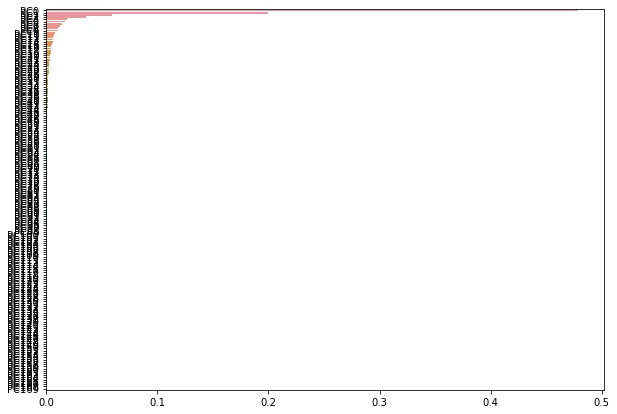

In [65]:
plt.figure(figsize = (10,7))
sn.barplot(x = pca.explained_variance_ratio_,y = ['PC' + str(i) for i in range(n_components)])


In [70]:
n_components = 10

In [71]:
pca = PCA(n_components = n_components)

In [72]:
pca

PCA(n_components=10)

In [73]:
pca.fit(X_train)

PCA(n_components=10)

# Dimensionality Reduction With PCA

In [74]:
X_train_reduce = pd.DataFrame(pca.transform(X_train) ,index = X_train.index , columns = ['PC'+str(i) for i in range(10)])

In [75]:
X_test_reduce = pd.DataFrame(pca.transform(X_test),index = X_test.index,columns = ['PC'+str(i) for i in range(10) ])

In [76]:
X_train_reduce 

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.654892,0.231792,-0.631576,-1.113085,0.629908,-1.732415,0.593101,0.167616,0.113410,-0.434278
1,0.737433,-0.873624,0.546222,-0.314210,-0.185739,0.317109,0.023046,0.517056,0.442566,-0.369279
2,-0.239952,-0.229745,0.499109,-0.449917,-0.430592,0.209944,-0.399859,-0.325528,-0.194303,0.404530
3,-3.677815,2.040501,0.283591,-0.060540,-0.035350,-0.124737,0.092516,-0.015774,-0.016755,-0.166373
4,1.993336,-0.824339,-1.060542,-0.048451,-0.720426,-0.264301,0.046177,-0.364075,-0.363154,-0.750286
...,...,...,...,...,...,...,...,...,...,...
59995,5.515235,1.311552,-0.915232,-0.907502,-0.519737,-0.094871,0.104390,-0.691735,-0.361237,-0.184753
59996,-1.271349,-2.650293,1.140903,0.269618,0.772715,-0.280660,-0.091092,-0.005309,-0.190343,0.312336
59997,-1.475824,-2.644774,1.511492,0.244883,0.750658,-0.228021,-0.036384,-0.001812,-0.232506,0.307148
59998,2.815354,0.355274,1.648486,-1.940332,0.317536,-1.574302,1.256066,0.500146,0.118218,0.380921


In [77]:
X_test_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-3.413720,1.989105,-0.540269,0.158015,0.152790,-0.062797,0.259606,0.031410,-0.038703,-0.398228
1,-2.445055,-0.480411,0.799682,0.126009,-0.124639,0.260492,0.011775,0.107607,0.061013,-0.077640
2,2.266421,-0.704871,-0.999104,2.170370,-0.556090,-0.040113,-0.037043,-0.579043,0.555901,-0.344011
3,1.854550,-1.071721,-0.395230,-0.562790,-0.417058,0.321169,0.518026,-0.322423,0.055152,-0.152864
4,-1.429856,-2.515618,1.156808,0.256252,-0.233676,0.562326,-0.193187,0.186933,0.076102,0.121845
...,...,...,...,...,...,...,...,...,...,...
15995,3.123536,-0.532011,-0.425721,-0.584632,0.046178,-1.568890,0.395558,-0.295658,-0.195600,0.027788
15996,-3.676986,2.043057,0.301175,-0.068181,-0.051928,-0.129883,0.099016,-0.021938,-0.007482,-0.148489
15997,2.776987,0.694711,-1.543737,-1.038096,-1.044213,-0.337305,0.063796,-0.830332,-0.258644,0.152984
15998,-3.518111,2.027398,-0.135852,0.055642,0.125642,-0.016713,0.156126,0.034024,0.024818,-0.183826


In [78]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [80]:
rog.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
rog.score(X_test,y_test)

0.9896875

In [82]:
pca.explained_variance_ratio_

array([0.47820713, 0.199354  , 0.05954733, 0.03623976, 0.01888164,
       0.01713855, 0.01414567, 0.01204178, 0.01021294, 0.00989772])

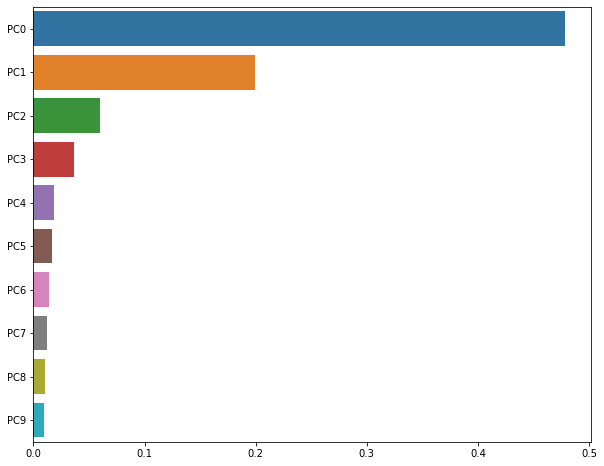

In [83]:
plt.figure(figsize = (10,8))
sn.barplot(x = pca.explained_variance_ratio_ ,y = ['PC' + str(i) for i in range(n_components)])

In [85]:
n_components = 5

In [86]:
pca = PCA(n_components = n_components)

In [87]:
pca.fit(X_train)

PCA(n_components=5)

In [88]:
X_train_reduce = pd.DataFrame(pca.transform(X_train), index = X_train.index , columns = ['PC' + str(i) for i in range(n_components)])

In [89]:

X_train_reduce

,PC0,PC1,PC2,PC3,PC4
0,3.654892,0.231792,-0.631576,-1.113085,0.629898
1,0.737433,-0.873624,0.546222,-0.314210,-0.185725
2,-0.239952,-0.229745,0.499109,-0.449917,-0.430592
3,-3.677815,2.040501,0.283591,-0.060540,-0.035350
4,1.993336,-0.824339,-1.060542,-0.048451,-0.720422
...,...,...,...,...,...
59995,5.515235,1.311552,-0.915232,-0.907502,-0.519741
59996,-1.271349,-2.650293,1.140903,0.269618,0.772718
59997,-1.475824,-2.644774,1.511492,0.244883,0.750659
59998,2.815354,0.355274,1.648486,-1.940332,0.317527


In [90]:
X_test_reduce = pd.DataFrame(pca.transform(X_test), index = X_test.index , columns = ['PC' + str(i) for i in range(n_components)])

In [91]:
X_test_reduce

,PC0,PC1,PC2,PC3,PC4
0,-3.413720,1.989105,-0.540269,0.158015,0.152786
1,-2.445055,-0.480411,0.799682,0.126009,-0.124640
2,2.266421,-0.704871,-0.999104,2.170369,-0.556115
3,1.854550,-1.071721,-0.395230,-0.562790,-0.417056
4,-1.429856,-2.515618,1.156808,0.256252,-0.233676
...,...,...,...,...,...
15995,3.123536,-0.532011,-0.425721,-0.584632,0.046167
15996,-3.676986,2.043057,0.301175,-0.068181,-0.051928
15997,2.776987,0.694711,-1.543737,-1.038096,-1.044193
15998,-3.518111,2.027398,-0.135852,0.055642,0.125641


In [92]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [95]:
pca.explained_variance_ratio_

array([0.47820713, 0.199354  , 0.05954733, 0.03623976, 0.01888164])

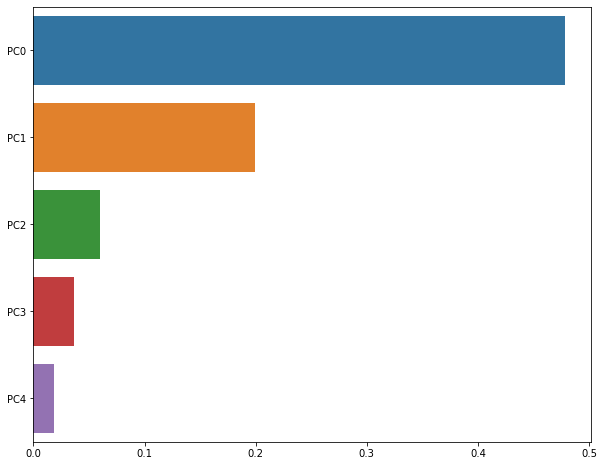

In [98]:
plt.figure(figsize = (10,8))
sn.barplot(x = pca.explained_variance_ratio_ ,y = ['PC'+ str(i) for i in range(n_components)])